# 1. Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [4]:
from sklearn.linear_model import LinearRegression

# 2. Data
## 2.1. Data Import

In [5]:
data = pd.read_csv('../data/prices.txt')

In [6]:
data.shape
data.head()

(47, 3)

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
X = data[['area', 'rooms']].values
y = data['price'].values

## 2.2. Visualisation

In [8]:
xlabel_lst = ('Area', 'Rooms')

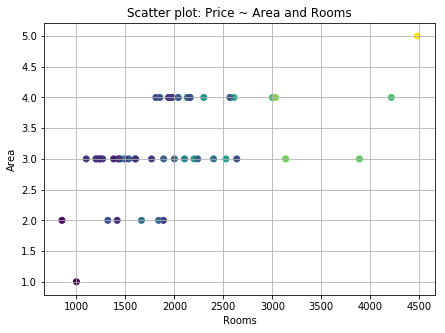

In [9]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Scatter plot: Price ~ %s and %s' % xlabel_lst)
plt.ylabel('Area')
plt.xlabel('Rooms')
plt.grid();

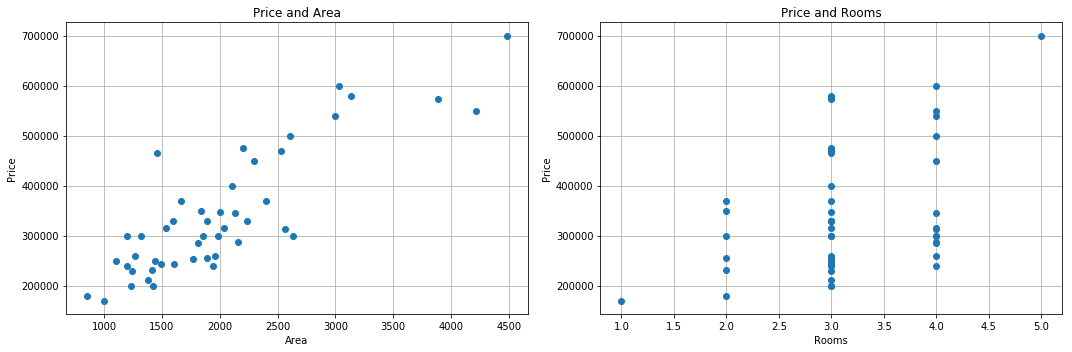

In [10]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.plot(X[:,i], y, 'o')
    plt.title('Price and %s' % xlabel_lst[i])
    plt.ylabel('Price')
    plt.xlabel(xlabel_lst[i])
    plt.grid()
    
plt.tight_layout();

# 3. Gradient Descent

In [14]:
from LinearRegression import LinearRegression
from lr_utils import min_max_vec, linspace_vec

In [15]:
LR = LinearRegression(eta=3e-7, epsilon=0.005, teta=0.005,
                      batch_size=1, random_state=112358,
                      epochs=1000, fit_intercept=True, k='inversed_epoch')

In [16]:
LR.fit(X, y)

In [17]:
print('Number of epochs = %d' % LR.n_epoch)
print('R^2 = %.4f' % LR.score(X, y))

LR.coef_fitted

Number of epochs = 163
R^2 = 0.6852


array([1.15820629e-01, 1.67514458e+02, 3.25797174e-01])

In [18]:
# Точки для построения графиков
X_min_max = min_max_vec(X)
X_linspase = linspace_vec(X_min_max)

coo = np.c_[np.ones(X_linspase.shape[1]), X_linspase.T]
y_pred = np.dot(coo, LR.coef_fitted)

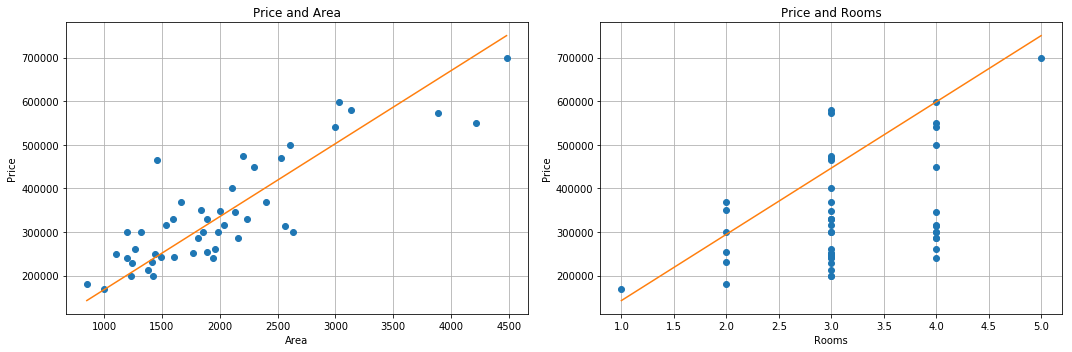

In [19]:
plt.figure(figsize=(15, 5))
for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.plot(X[:, i - 1], y, 'o')
    plt.plot(coo[:, i], y_pred, '-')
    plt.title('Price and %s' % xlabel_lst[i - 1])
    plt.ylabel('Price')
    plt.xlabel(xlabel_lst[i - 1])
    plt.grid()
    
plt.tight_layout();

In [20]:
coef_diff = norm(np.diff(LR._coef, axis=0), axis=1)
plot_data = [LR._losses, coef_diff]
ylabels = ['Loss', 'Norm of coefficients delta']
titles = ['Plot of loss changes', 'Plot of coefficients changes']

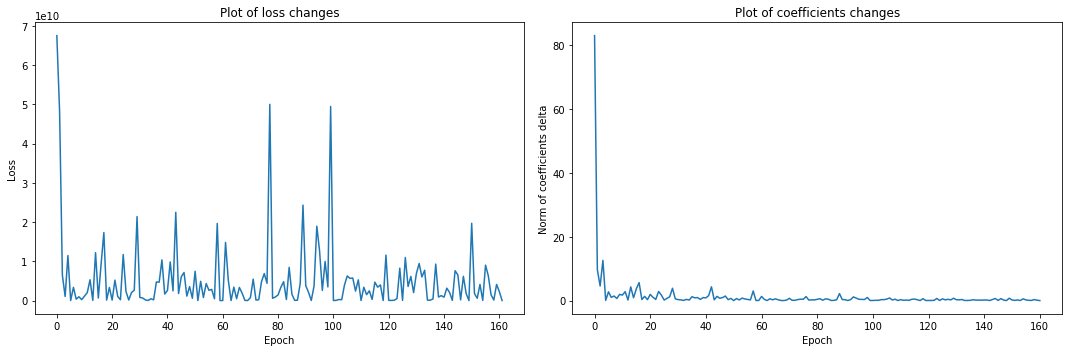

In [21]:
plt.figure(figsize=(15, 5))
for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.plot(plot_data[i - 1])
    plt.title('Price and %s' % xlabel_lst[i - 1])
    plt.xlabel('Epoch')
    plt.ylabel(ylabels[i - 1])
    plt.title(titles[i - 1])
    
plt.tight_layout();

In [23]:
LR._losses[-1]

5709831.032154106

In [24]:
pow(LR._losses[-1], 0.5)

2389.5252733867674

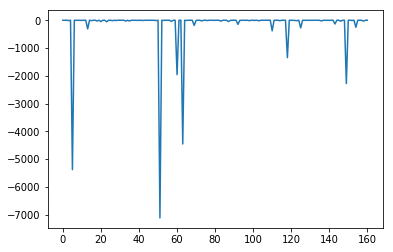

In [25]:
plt.plot(-np.diff(LR._losses) / LR._losses[:len(LR._losses) - 1]);

### Hide-input mode

In [20]:
from IPython.display import HTML

In [21]:
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')